# Libaries

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.autograd import Variable

import numpy as np

import os

import matplotlib.pyplot as plt

# Generall

In [12]:
print('Cuda is available:',torch.cuda.is_available(),'\n')

Cuda is available: False 



# Hyperparameters

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_dim = 128

batch_size = 6000

num_epochs = 1
learn_rate = 0.0002


# Load Data

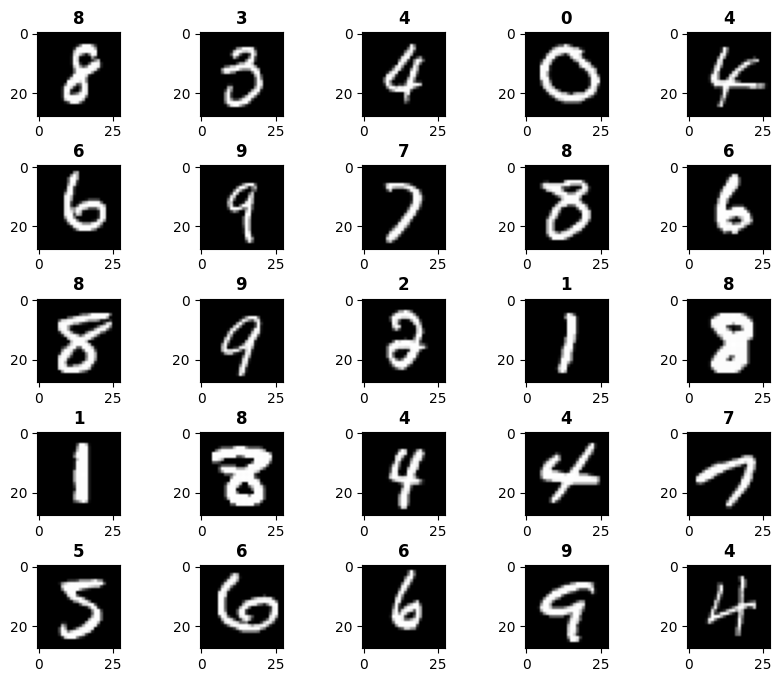

In [14]:
# create folder structure if it does not exist
folder_path = "../../data/"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


#MNIST Dataset
    #Create Folder, transorm to Tensor
train_dataset = torchvision.datasets.MNIST(
    root=folder_path, train=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.01307),(0.3081))]), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root=folder_path, train=False, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.01307),(0.3081))])
)

#Data Loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

#show MNIST Dataset

figure= plt.figure(figsize=(10,8))
spalten, zeilen = 5,5
for i in range(1,spalten*zeilen+1):
    sample_idx = torch.randint(len(train_dataset),size=(1,)).item()
    image , label = train_dataset[sample_idx]
    figure.add_subplot(spalten,zeilen,i)
    plt.title(label, weight='bold')
    plt.imshow(image.squeeze(), cmap='gray')
plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.show()


# Model

In [15]:
class MNIST_De_Class(nn.Module):
    def __init__(self):
        super(MNIST_De_Class, self).__init__()
        # self.input = nn.Linear(28 * 28, 20)  # input
        # self.hidden1 = nn.Linear(20, 20)  # hidden1
        # self.hidden2 = nn.Linear(20, 20)  # hidden2
        # self.out = nn.Linear(20, 10)  # output
      
        self.network = nn.Sequential(
            nn.Linear(28 * 28, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 10),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # x = self.input(x)
        # x = nn.ReLU(x)
        # x = self.hidden1(x)
        # x = nn.ReLU(x)
        # x = self.hidden2(x)
        # x = nn.ReLU(x)
        # x = self.out(x)
        # x = nn.Softmax(x)
        # print(x.size())
        return (self.network(x))

# View Prediction Setup

In [16]:
def view_classifications(img,pred):
    pred = pred.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    bars = ax2.barh(np.arange(10), pred)
    
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    for bar, val in zip(bars, pred):
        if not (val < 0.3):
            ax2.text(val, bar.get_y() + bar.get_height() / 2, round(val, 2), va='center')

    plt.tight_layout()
    plt.show()
    plt.close()

# Train

Batch in Epoche  1 Loss: 1.48403 


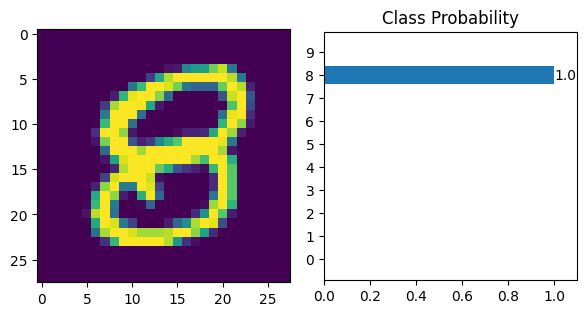

Batch in Epoche  2 Loss: 1.48441 


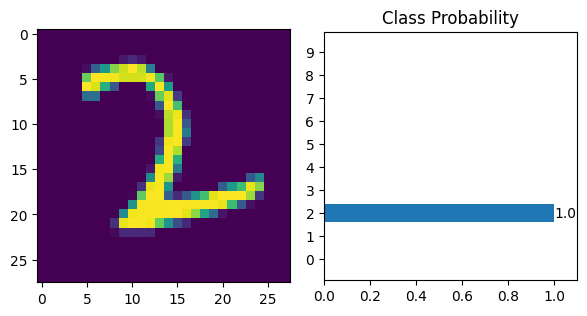

Batch in Epoche  3 Loss: 1.48573 


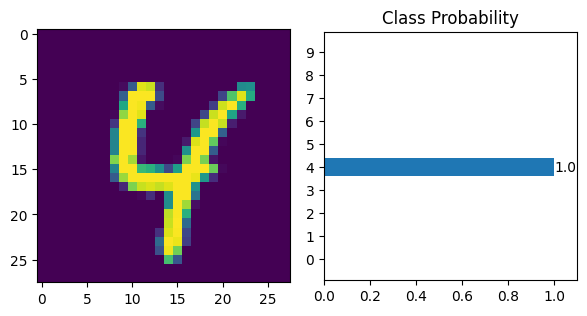

Batch in Epoche  4 Loss: 1.48778 


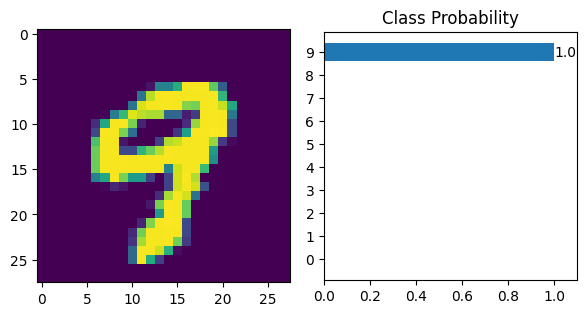

Batch in Epoche  5 Loss: 1.48432 


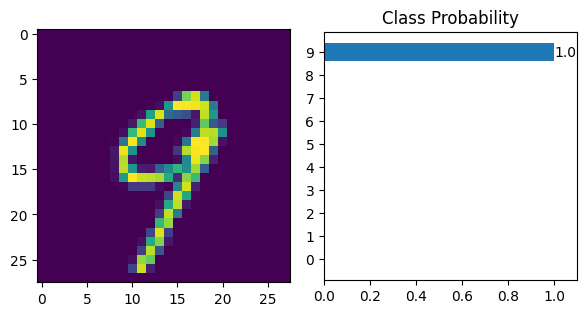

Batch in Epoche  6 Loss: 1.48906 


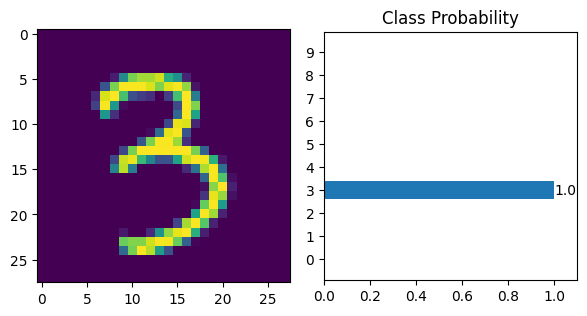

Batch in Epoche  7 Loss: 1.48741 


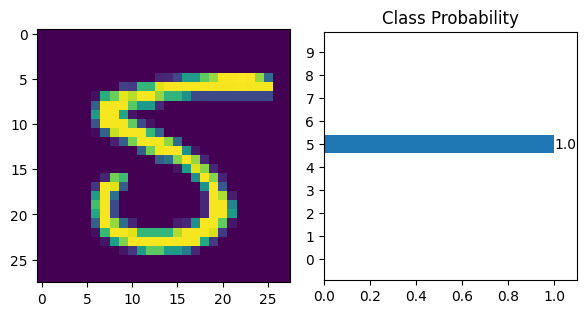

Batch in Epoche  8 Loss: 1.48766 


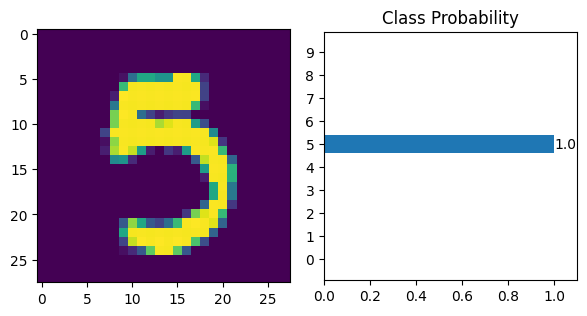

Batch in Epoche  9 Loss: 1.48462 


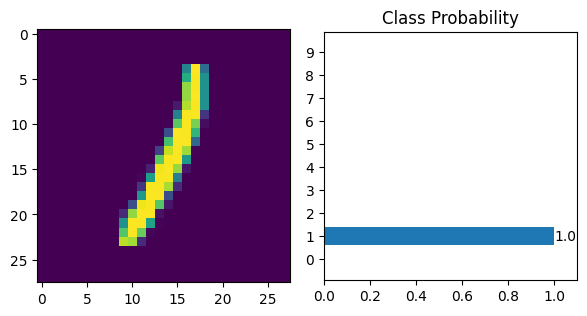

Batch in Epoche  10 Loss: 1.48449 


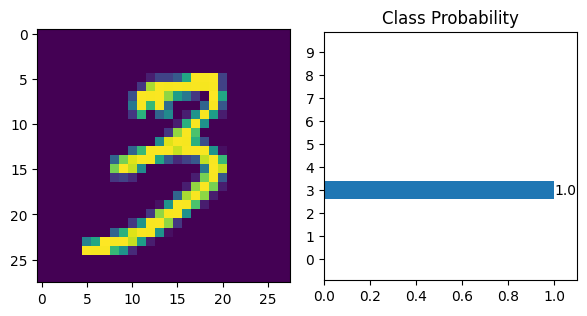

Epoche: 1 Loss: 1.48449 


In [17]:
model1 = MNIST_De_Class().to(device)

#Load Model / Continue Training
continue_training = True


FILE = "model1.pth"

if continue_training:
    model1 = torch.load(FILE).to(device)

#criterion / lf
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.Adam(params=model1.parameters(),lr=learn_rate)

for epoch in range(num_epochs):
    for batch_id, (data,target) in enumerate(train_loader):
        data = data.reshape(-1,28*28).to(device)  #[100, 1,28,28] > [100,734] ?
        target = target.to(device)
        
        output = model1(data) #was macht out?
        loss = criterion(output,target) #hier out?!

        print('Batch in Epoche ',batch_id+1, 'Loss: %.5f ' % loss)
        view_classifications(data[0].view(1,28,28),output[0])
        

        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
    print('Epoche:',epoch+1, 'Loss: %.5f ' % loss)
    
    # if epoch %2 == 0:
    #     view_classifications(data[0].view(1,28,28),output[0])

# Save Model

In [18]:
torch.save(model1,FILE)

# Confusuion Matrix

In [19]:
# label_list = torch.zeros(batch_size)
# pred_list = torch.zeros(batch_size)

# print(label_list, pred_list)

# with torch.no_grad():
#     for data,target in test_dataset:
#         data = data.reshape(-1,28,28).to(device)
#         target = target.to(device)

#         outconf= model1(data)

        

# Evaluation

In [20]:
# model1 = torch.load(FILE)

# with torch.no_grad():
#     for batch_id, (data,target) in enumerate(test_loader):
#         data = data.reshape(-1,28*28).to(device)  #[100, 1,28,28] > [100,734] ?
#         target = target.to(device)
        
#         output = model1(data) #was macht out?
#         loss = criterion(output,target) #hier out?!

#         view_classifications(data[0].view(1,28,28),output[0])
#         print('Batch in Epoche ',batch_id+1, 'Loss: %.5f ' % loss)

#     print('Epoche:',epoch+1, 'Loss: %.5f ' % loss)
